<a href="https://colab.research.google.com/github/m0hmedtarek/KNN-DT-and-Logistic-using-sklearn/blob/master/KNN_%2CDT_and_Logistic_using_sklearn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

digits = load_digits()

In [0]:
digits.data.shape


(1797, 64)

In [0]:
digits.target.shape

(1797,)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.20, random_state=0)

In [0]:
x_train.shape


(1437, 64)

In [0]:
y_train.shape

(1437,)

In [0]:
x_test.shape

(360, 64)

In [0]:
y_test.shape

(360,)

In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='liblinear', multi_class='ovr')

logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print('Accuracy on the training subset: {:.3f}'.format(logisticRegr.score(x_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(logisticRegr.score(x_test, y_test)))

Accuracy on the training subset: 0.996
Accuracy on the test subset: 0.950


In [0]:
logreg_100 = LogisticRegression(C=100, solver='liblinear', multi_class='ovr')
logreg_100.fit(x_train, y_train)
print('100 Accuracy on the training subset: {:.3f}'.format(logreg_100.score(x_train, y_train)))
print('100 Accuracy on the test subset: {:.3f}'.format(logreg_100.score(x_test, y_test)))

100 Accuracy on the training subset: 0.999
100 Accuracy on the test subset: 0.939


In [0]:
logreg_001 = LogisticRegression(C=0.01, solver='liblinear', multi_class='ovr')
logreg_001.fit(x_train, y_train)
print('001 Accuracy on the training subset: {:.3f}'.format(logreg_001.score(x_train, y_train)))
print('001 Accuracy on the test subset: {:.3f}'.format(logreg_001.score(x_test, y_test)))

001 Accuracy on the training subset: 0.983
001 Accuracy on the test subset: 0.961


In [0]:
y_pred = logreg_001.predict(x_test)
print(y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 4 3
 4 8 9 7 7 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 8 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


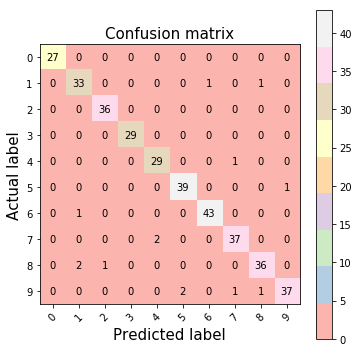

In [0]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [0]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.94      0.93        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.95      0.97      0.96        40
           6       0.98      0.98      0.98        44
           7       0.95      0.95      0.95        39
           8       0.95      0.92      0.94        39
           9       0.97      0.90      0.94        41

   micro avg       0.96      0.96      0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [0]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,42,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print("at k = "+str(i)+" , accuracy =  "+str(knn.score(x_test,y_test)*100)+str("%"))

at k = 1 , accuracy =  98.88888888888889%
at k = 3 , accuracy =  98.33333333333333%
at k = 5 , accuracy =  97.5%
at k = 7 , accuracy =  97.5%
at k = 9 , accuracy =  97.5%
at k = 11 , accuracy =  97.22222222222221%
at k = 13 , accuracy =  97.22222222222221%
at k = 15 , accuracy =  96.94444444444444%
at k = 17 , accuracy =  96.66666666666667%
at k = 19 , accuracy =  96.11111111111111%
at k = 21 , accuracy =  96.38888888888889%
at k = 23 , accuracy =  96.38888888888889%
at k = 25 , accuracy =  96.11111111111111%
at k = 27 , accuracy =  96.38888888888889%
at k = 29 , accuracy =  96.11111111111111%
at k = 31 , accuracy =  95.83333333333334%
at k = 33 , accuracy =  95.83333333333334%
at k = 35 , accuracy =  95.83333333333334%
at k = 37 , accuracy =  96.11111111111111%
at k = 39 , accuracy =  95.83333333333334%
at k = 41 , accuracy =  95.55555555555556%


In [0]:
predictions = knn.predict(x_test)

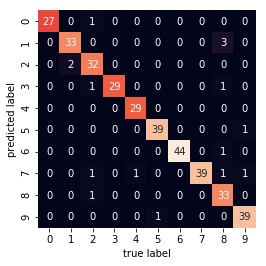

In [0]:
mat = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.92      0.94      0.93        35
           2       0.94      0.89      0.91        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      1.00      0.99        44
           7       0.91      1.00      0.95        39
           8       0.97      0.85      0.90        39
           9       0.97      0.95      0.96        41

   micro avg       0.96      0.96      0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print('Accuracy on the training subset:',tree.score(x_train, y_train))
print('Accuracy on the test subset:',tree.score(x_test, y_test))

Accuracy on the training subset: 1.0
Accuracy on the test subset: 0.8472222222222222


Another Model with Max Depth 

In [0]:
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(x_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(x_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(x_test, y_test)))



Accuracy on the training subset: 0.976
Accuracy on the test subset: 0.850


In [0]:
predict_y = tree.predict(x_test)


[[24  0  0  0  0  0  1  0  0  2]
 [ 0 29  1  1  1  0  1  0  2  0]
 [ 1  1 29  3  0  0  0  0  1  1]
 [ 0  0  2 27  0  0  0  0  0  0]
 [ 1  0  0  0 26  0  2  1  0  0]
 [ 0  0  1  0  0 34  1  0  1  3]
 [ 1  1  1  1  1  0 39  0  0  0]
 [ 0  0  0  0  1  1  0 37  0  0]
 [ 0  3  2  5  0  1  0  1 27  0]
 [ 0  0  1  3  0  1  0  0  2 34]]


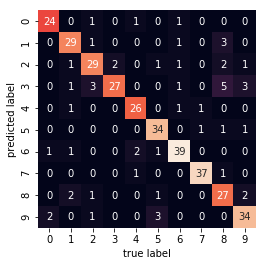

In [0]:
cm1 = metrics.confusion_matrix(y_test, predict_y)
print(cm1)
sns.heatmap(cm1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
print(metrics.classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.85      0.83      0.84        35
           2       0.78      0.81      0.79        36
           3       0.68      0.93      0.78        29
           4       0.90      0.87      0.88        30
           5       0.92      0.85      0.88        40
           6       0.89      0.89      0.89        44
           7       0.95      0.95      0.95        39
           8       0.82      0.69      0.75        39
           9       0.85      0.83      0.84        41

   micro avg       0.85      0.85      0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



<bound method BaseEstimator.set_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>
[0.         0.         0.00596418 0.01008194 0.00384316 0.02030026
 0.0015669  0.         0.         0.00802322 0.01180158 0.00254242
 0.00365752 0.00471577 0.00080287 0.         0.         0.00446725
 0.01188326 0.03661079 0.02671281 0.1028785  0.         0.
 0.00159059 0.         0.06944978 0.05610116 0.01713189 0.01703646
 0.         0.         0.         0.05327008 0.0126678  0.00556656
 0.09973427 0.01398081 0.01848039 0.         0.         0.00923453
 0.12552377 0.08406944 0.02408507 0.00810655 0.         0.
 0.         0.         0.00155851 0.00289033 0.00497309 0.0714876
 0.02219858 0.         0.  

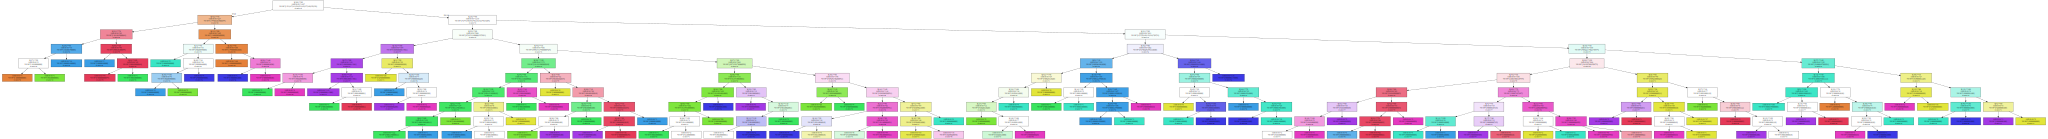

In [0]:
import graphviz 
from sklearn.tree import export_graphviz

Graph = export_graphviz(tree, 
                impurity=False, filled=True,class_names=digits.target_names.astype(str))
print(tree.set_params)
print(tree.feature_importances_)

graphviz.Source(Graph)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
cross_val_score(logisticRegr, digits.data, digits.target, cv=5)

array([0.92307692, 0.88121547, 0.94986072, 0.95798319, 0.89295775])

In [0]:
cross_val_score(knn, digits.data, digits.target, cv=5)

array([0.92582418, 0.92265193, 0.93036212, 0.94677871, 0.92676056])

In [0]:
cross_val_score(tree, digits.data, digits.target, cv=5)
    

array([0.76923077, 0.71270718, 0.79387187, 0.83193277, 0.78309859])

In [0]:
scores1 = cross_val_score(logisticRegr, digits.data, digits.target, cv=5)
np.average(scores1)

0.9210188113360701

In [0]:
scores2 = cross_val_score(knn, digits.data, digits.target, cv=5)
np.average(scores2)

0.9304755002764704

In [0]:
scores3 = cross_val_score(tree, digits.data, digits.target, cv=5)
np.average(scores3)

0.778168236501003